In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [38]:
(x_train,y_train),(x_test , y_test) = keras.datasets.mnist.load_data()

In [39]:
len(x_train) , len(y_train)

(60000, 60000)

In [40]:
len(x_test) , len(y_test)

(10000, 10000)

In [41]:
x_train = x_train/255
x_test = x_test/255

In [42]:
x_train_flat = x_train.reshape(len(x_train),28*28)

In [43]:
x_test_flat = x_test.reshape(len(x_test),28*28)

In [44]:
model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(100,activation='relu'),
          keras.layers.Dense(10,activation='sigmoid')                

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=100)
history



/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8731 - loss: 0.4548
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9627 - loss: 0.1301
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0889
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9805 - loss: 0.0663
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0510
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0410
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9903 - loss: 0.0325
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0278
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9941 - loss: 0.0201
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9945 - loss: 0.0177
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9964 - loss: 0.0140
Epoch 12/100
1875/1

In [45]:
x_test_reshaped = x_test_flat.reshape(-1, 28, 28)  # Reshape to match model input
model.evaluate(x_test_reshaped, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9745 - loss: 0.2810


[0.23001894354820251, 0.977400004863739]

In [46]:
y_pred = model.predict(x_test_reshaped)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [47]:
cm = tf.math.confusion_matrix(labels = y_test , predictions=y_pred_labels)

In [48]:
import numpy as np
upper_limit = np.max(cm)


Text(95.72222222222221, 0.5, 'True values')

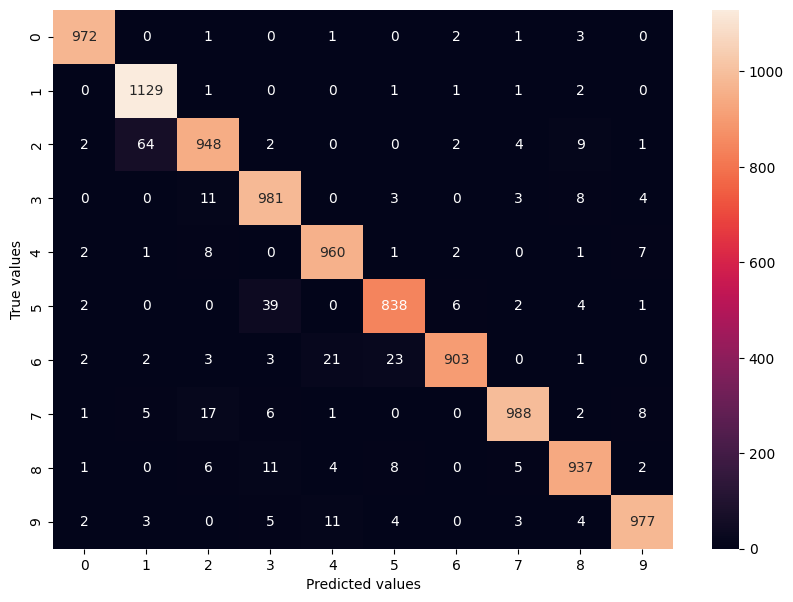

In [49]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot= True , fmt = 'd')
plt.xlabel('Predicted values')
plt.ylabel('True values')

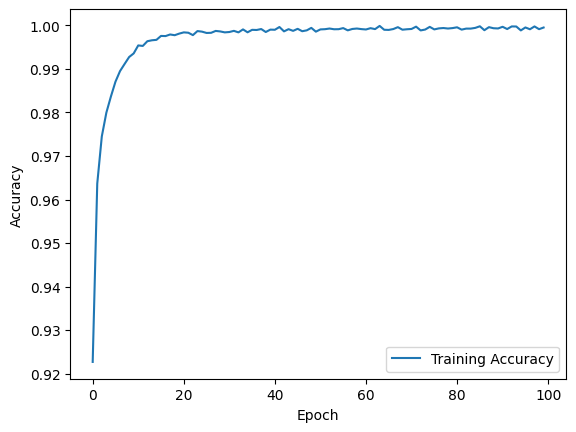

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
